In [1]:
import os
import json
import glob
from matplotlib.patches import Circle

!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import zipfile
import shutil

from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Data Processing


###Utils

In [3]:
#show image and coords function
def show_img_and_eyes(img, coords=None):
    fig,ax = plt.subplots(1)
    ax.set_aspect('equal')



    ax.imshow(img)
    if(coords is not None):
      a=tuple(coords[:2])
      b=tuple(coords[2:])
      circ = Circle(a,6)
      circ2 = Circle(b,6)

      ax.add_patch(circ)
      ax.add_patch(circ2)

    return plt.show()

###Get dicts

In [60]:
def get_dict_with_list(data):
  dict1 = { 
      'image':' ',
      'keypoints': {
          0: 1,
          1: 2,
          2: 3,
          3: 4,
      }
  }

  dict1['image'] = data[4]
  dict1['keypoints'][0] = int(data[0])
  dict1['keypoints'][1] = int(data[1])

  dict1['keypoints'][2] = int(data[2])
  dict1['keypoints'][3] = int(data[3])

  print(dict1)

  return dict1

In [6]:
def get_dict(data):
  dict1 = { 
      'image': ' ',
      'keypoints': {
          0: 21,
          1: 214,
          2: 5532,
          3: 425,
      }
  }

  dict1['image'] = data['imagePath']
  dict1['keypoints'][0] = data['shapes'][0]['points'][0][0] 
  dict1['keypoints'][1] = data['shapes'][0]['points'][0][1] 

  dict1['keypoints'][2] = data['shapes'][1]['points'][0][0] 
  dict1['keypoints'][3] = data['shapes'][1]['points'][0][1] 

  return dict1

###Get methods

In [7]:
def get_folder_images(path,resize,image_size=150, min=1 , max=31 ):

  images = []
  for index in range (min , max): 
      j=path+'/'+str(index)+'.jpg' 
      img = cv2.imread(os.path.join(j))
      print(j)
      if(resize):
        img = cv2.resize(img,(image_size, image_size))
      images.append(img)

  return np.array(images)

In [8]:
#get labels
def get_labels(min=0,max=31, path=''):

  points=[]
  for index in range (min,max): 
      filename=os.path.join(path, str(index)+'.json')  
      with open(filename, encoding='utf-8', mode='r') as f:
          label = json.load(f)
          one_label=[]
          one_label.append(label['keypoints']['0'])
          one_label.append(label['keypoints']['1'])
          one_label.append(label['keypoints']['2'])
          one_label.append(label['keypoints']['3'])
          one_label.append(label['image'])

          print(one_label[4])
          points.append(one_label)


  return points

##Create Basic DB

###Resize images

In [ ]:
#sacamos las imagenes de la carpeta
folderPath = '/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/data/images'

images=get_folder_images(folderPath, True ,250)

In [ ]:
images.shape

(30, 250, 250, 3)

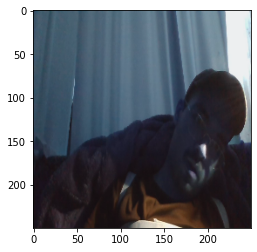

In [ ]:
plt.imshow(images[29])

In [ ]:
os.mkdir('/content/new_images')

index = 0
for img in images:
  image = Image.fromarray(img, 'RGB')
  index+=1
  image.save('/content/new_images/cow_img{}.jpg'.format(index))

In [ ]:
!zip -r /content/new_images.zip /content/new_images  

###label the images and clean the labels

In [ ]:
label_path='/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/raw_labels/'
new_label_path='/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/labels/'


In [ ]:
index=1
for filename in glob.glob(os.path.join(label_path, '*.json')):    
    with open(filename, encoding='utf-8', mode='r') as currentFile:
           data = json.load(currentFile)
           new_data=get_dict(data)
           name= str(index)
           with open(new_label_path+name+'.json', "w") as p:
             json.dump(new_data, p)
           print(index) 
           index+=1

##Data augmentation


In [9]:
def get_template():
  template = np.arange(0,62500)
  template = template.reshape(250,250)
  return template

###get test images and labels

In [10]:
raw_img = r'/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/images'
raw_labels = r'/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/labels'

In [ ]:
test_img=get_folder_images(raw_img, False )

In [12]:
points = get_labels(1,31,raw_labels)

cow_img1.jpg
cow_img2.jpg
cow_img3.jpg
cow_img4.jpg
cow_img5.jpg
cow_img6.jpg
cow_img7.jpg
cow_img8.jpg
cow_img9.jpg
cow_img10.jpg
cow_img11.jpg
cow_img12.jpg
cow_img13.jpg
cow_img14.jpg
cow_img15.jpg
cow_img16.jpg
cow_img17.jpg
cow_img18.jpg
cow_img19.jpg
cow_img20.jpg
cow_img21.jpg
cow_img22.jpg
cow_img23.jpg
cow_img24.jpg
cow_img25.jpg
cow_img26.jpg
cow_img27.jpg
cow_img28.jpg
cow_img29.jpg
cow_img30.jpg


In [ ]:
img = test_img[0].copy()
label = points[0].copy()
show_img_and_eyes(img, label)

###Efects

####Translation

In [16]:
def translate (img, label, x , y):
    trans_matrix = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], img.shape[0])

    img = cv2.warpAffine(img, trans_matrix, dimensions)
    label[0] += x
    label[1] += y
    label[2] += x
    label[3] += y
  
    return [img, label]


In [ ]:
img = test_img[2].copy()
label = points[2].copy()

translated = translate(img, label, -50, 50)
show_img_and_eyes(translated[0], translated[1])

[77.90514905149053, 150.8130081300813, 97.14634146341464, 149.1869918699187]

####Color Efects

In [17]:
def negative(img):
  img = 255-img
  return img

In [ ]:
img = test_img[0].copy()
label = points[0].copy()
img = negative(img)
show_img_and_eyes(img, label)

In [18]:
def saturation(img):
  img =img * 2
  return img

In [ ]:
img = test_img[20].copy()
label = points[20].copy()
img = saturation(img)
show_img_and_eyes(img, label)

####Flip

In [26]:
def flip(img, complete_label, flip=0):
  
  label=complete_label[:4]

  #label flip
  template = get_template()
  coords = [int(x) for x in label]
  points_indexes = template[coords[0], coords[1]]
  points_indexes2 = template[coords[2], coords[3]]

  label_flip=0

  if flip == 0 : 
    label_flip = -1
  elif flip == 1 :
    label_flip = 0


  template = np.flip(template,label_flip)

  new_coords1 = np.where(template==points_indexes)
  new_coords2 = np.where(template==points_indexes2)

  all_coord=[
     new_coords1[0][0], 
     new_coords1[1][0],
     new_coords2[0][0],
     new_coords2[1][0],  
     complete_label[4]
  ]

  if flip == -1 :
    all_coord = complete_label

  #img flip
  #img = cv2.flip(img,flip)
  img = np.flip(img, flip) 

  return [img,all_coord]

In [ ]:
img = test_img[0].copy()
label = points[0].copy()
img, label= flip(img, label, 0)
show_img_and_eyes(img, label)

###Create Augmented Data

In [20]:
img_dir='/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/agumented_images/'
label_dir = '/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/augmented_labels/'

In [ ]:
def data_agumentation(imgs, lbls, img_dir, label_dir, index_min, index_max):
  agumented_img =[]
  agumented_lbls=[]
  
  for i in range (index_min, index_max):


    print(i)

    img=imgs[i].copy()
    label=lbls[i].copy()

    img1, lbl1 = flip(img, label.copy(), 0)
    img2, lbl2 = flip(img, label.copy(), 1)
    img3, lbl3 = translate(img, label.copy() , -50, 50)
    img4, lbl4 = translate(img, label.copy() , -20, -20)
    img5 = negative(img)
    img6 = saturation(img)

    agumented_img.extend([img1,img2,img3,img4,img5,img6])
    agumented_lbls.extend([lbl1,lbl2,lbl3,lbl4,label,label])

  return [agumented_img, agumented_lbls]

In [ ]:
agumented_img, agumented_lbls = data_agumentation(test_img,points,img_dir,label_dir,0,30)

In [58]:
def save_augmented_img(imgs):
    index = 0
    for img in imgs:
      index+=1
      image = Image.fromarray(img, 'RGB')
      image.save(img_dir+str(index)+'.jpg')  
save_augmented_img(agumented_img)

In [ ]:
def save_augmented_labels(lbls):
  for index in range (0,len(lbls)):

    with open(label_dir+str(index+1)+'.json', "w") as p:
      dict_json=get_dict_with_list(lbls[index])
      json.dump(dict_json,p)

save_augmented_labels(agumented_lbls)      

In [ ]:
len(agumented_lbls)

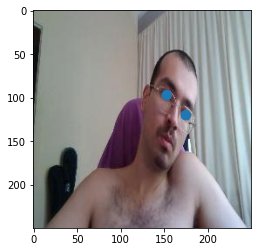

In [30]:
show_img_and_eyes(agumented_img[13],agumented_lbls[13])